In [1]:
import os
import numpy as np
import pandas as pd
import pickle

# Loading data and selection features

### Import data

In [2]:
# Define the folder path
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/dataset/"

# Define the file names
file_loan_inputs_train = 'loan_data_inputs_train.csv'
file_loan_targets_train = 'loan_data_targets_train.csv'
file_loan_inputs_test = 'loan_data_inputs_test.csv'
file_loan_targets_test = 'loan_data_targets_test.csv'

# Read the CSV files into DataFrames using os.path.join
loan_data_inputs_train = pd.read_csv(os.path.join(folder, file_loan_inputs_train), index_col=0, low_memory=False)
loan_data_targets_train = pd.read_csv(os.path.join(folder, file_loan_targets_train), index_col=0, low_memory=False)
loan_data_inputs_test = pd.read_csv(os.path.join(folder, file_loan_inputs_test), index_col=0, low_memory=False)
loan_data_targets_test = pd.read_csv(os.path.join(folder, file_loan_targets_test), index_col=0, low_memory=False)

In [3]:
sampling = False

In [4]:
if sampling:
    loan_data_inputs_train = loan_data_inputs_train.sample(n = 9000, random_state = 42)
    loan_data_targets_train = loan_data_targets_train.sample(n = 9000, random_state = 42)
    loan_data_inputs_test = loan_data_inputs_test.sample(n = 1000, random_state = 42)
    loan_data_targets_test = loan_data_targets_test.sample(n = 1000, random_state = 42)

### Explore data

In [5]:
loan_data_inputs_train.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
id,,,,,,,,,,,,,,,,,,,,,
34392215,37055507,5000,5000,5000.0,36 months,8.67,158.24,B,B1,Clinical Admission Director,...,0,0,0,0,0,0,0,1,0,0
19345890,21548652,20000,20000,20000.0,36 months,12.49,668.98,B,B5,Superintendent,...,0,0,0,1,0,0,0,0,0,0
5145550,6467765,19200,19200,19175.0,36 months,14.09,657.06,B,B5,Larsen & Toubro Infotech,...,0,0,0,1,0,0,0,0,0,0
4374922,5607101,15500,15500,15500.0,36 months,11.14,508.48,B,B2,City of Fall River,...,0,1,0,1,0,0,0,0,0,0
5935292,7407427,14075,14075,14075.0,36 months,11.55,464.48,B,B3,Clancy's Auto Body,...,0,0,0,0,0,0,0,0,0,1


In [6]:
loan_data_targets_train.tail()

,good_bad
id,
34392215,1
19345890,1
5145550,1
4374922,1
5935292,1


In [7]:
loan_data_inputs_train.shape

(373028, 321)

In [8]:
loan_data_targets_train.shape

(373028, 1)

In [9]:
loan_data_inputs_test.shape

(93257, 321)

In [10]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [11]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<40',
'mths_since_issue_d:40-42',
'mths_since_issue_d:42-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:52-56',
'mths_since_issue_d:56-70',
'mths_since_issue_d:>70',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [12]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>70',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [13]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
id,,,,,,,,,,,,,,,,,,,,,
12796369,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1439740,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5214749,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
13827698,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
422455,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [14]:
inputs_train.shape

(373028, 103)

In [15]:
# Value to count
val = 0

# Count the occurrences of 'val' in each cell of the DataFrame
count_df = inputs_train.map(lambda x: x == val)

# Sum the True values for each column
count_per_column = count_df.sum()
indices_equal_to_shape = [index for index, value in count_per_column.items() if value == inputs_train.shape[0]]
indices_equal_to_shape

[]

# PD Model Estimation

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
reg = LogisticRegression(max_iter=1000)

In [18]:
pd.options.display.max_rows = None

In [19]:
loan_data_targets_train.shape

(373028, 1)

In [20]:
loan_data_targets_train.values.ravel()

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
# reg.fit(inputs_train, loan_data_targets_train)
reg.fit(inputs_train, loan_data_targets_train.values.ravel())

LogisticRegression(max_iter=1000)

In [22]:
reg.intercept_

array([-1.78272047])

In [23]:
reg.coef_

array([[ 1.10380467e+00,  8.70604884e-01,  6.82532239e-01,
         4.99957214e-01,  3.22964818e-01,  1.32026216e-01,
         9.37487850e-02,  1.07631922e-01,  3.77817891e-02,
         6.11885847e-02,  6.01692626e-02,  6.39204711e-02,
         7.99252951e-02,  1.37803255e-01,  1.02202488e-01,
         1.85744822e-01,  2.40560555e-01,  2.25334729e-01,
         2.65585784e-01,  3.21216443e-01,  5.23536785e-01,
         8.82877085e-02, -1.40212376e-02,  3.02752510e-01,
         2.00152011e-01,  2.17707898e-01,  2.66598790e-01,
         4.80196281e-02,  7.79324453e-02,  1.00341869e-01,
         1.24123866e-01,  8.85317100e-02,  5.83222580e-02,
         1.21803906e-01,  1.16269336e+00,  1.01763846e+00,
         8.30789503e-01,  6.37315647e-01,  4.96932163e-01,
         2.55790552e-01,  8.95017820e-01,  5.66171541e-01,
         3.07308684e-01,  1.06281563e-01,  4.33700356e-02,
         4.16698601e-02,  5.21632269e-02,  1.16484211e-01,
         1.17066184e-01,  8.96902180e-02,  5.23606097e-0

In [24]:
def create_summary_table(reg, inputs_train):
    # Get the coefficients and feature names
    coefficients = reg.coef_[0]
    feature_names = inputs_train.columns

    # Get the intercept
    intercept = reg.intercept_[0]

    # Create DataFrames for coefficients and intercept
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})

    # Concatenate the intercept DataFrame at the 0th location
    summary_table = pd.concat([intercept_df, coef_df]).reset_index(drop=True)

    return summary_table

In [25]:
summary_table = create_summary_table(reg, inputs_train)
summary_table

,Feature,Coefficient
0,Intercept,-1.782720
1,grade:A,1.103805
2,grade:B,0.870605
3,grade:C,0.682532
4,grade:D,0.499957
5,grade:E,0.322965
6,grade:F,0.132026
7,home_ownership:OWN,0.093749
8,home_ownership:MORTGAGE,0.107632
9,addr_state:NM_VA,0.037782


## Build a Logistic Regression Model with P-Values

In [26]:
from sklearn import linear_model
from scipy import stats

In [27]:
class LogisticRegressionWithPValues:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        
        # Calculating p-values for coefficients
        denom = 2.0 * (1.0 + np.cosh(self.model.decision_function(X)))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]
        
        # Store model attributes
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [28]:
def create_summary_table(reg, inputs_train):
    # Get the coefficients and feature names
    coefficients = reg.coef_[0]
    feature_names = inputs_train.columns

    # Get the intercept
    intercept = reg.intercept_[0]

    # Create DataFrames for coefficients and intercept
    coef_df = pd.DataFrame({'Feature name': feature_names, 'Coefficients': coefficients})
    intercept_df = pd.DataFrame({'Feature name': ['Intercept'], 'Coefficients': [intercept]})

    # Concatenate the intercept DataFrame at the 0th location
    summary_table = pd.concat([intercept_df, coef_df]).reset_index(drop=True)

    # Get p-values
    p_values = reg.p_values
    p_values = np.append(np.nan, p_values)
    summary_table['p_values'] = p_values

    return summary_table

In [29]:
reg = LogisticRegressionWithPValues(max_iter=1000)

In [30]:
# inputs_train.info(verbose=True)

In [31]:
# reg.fit(inputs_train, loan_data_targets_train)
reg.fit(inputs_train, loan_data_targets_train.values.ravel())

In [32]:
summary_table = create_summary_table(reg, inputs_train)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.782720,NaN
1,grade:A,1.103805,2.075726e-34
2,grade:B,0.870605,4.876248e-47
3,grade:C,0.682532,7.783850e-34
4,grade:D,0.499957,1.125389e-20
5,grade:E,0.322965,1.850644e-11
6,grade:F,0.132026,8.466978e-03
7,home_ownership:OWN,0.093749,3.385398e-06
8,home_ownership:MORTGAGE,0.107632,2.349366e-17
9,addr_state:NM_VA,0.037782,2.386773e-01


In [33]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<40',
'mths_since_issue_d:40-42',
'mths_since_issue_d:42-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:52-56',
'mths_since_issue_d:56-70',
'mths_since_issue_d:>70',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [34]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>70',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [35]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
id,,,,,,,,,,,,,,,,,,,,,
12796369,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1439740,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5214749,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
13827698,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
422455,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [36]:
reg2 = LogisticRegressionWithPValues(max_iter = 1000)
reg2.fit(inputs_train, loan_data_targets_train.values.ravel())

In [37]:
summary_table = create_summary_table(reg2, inputs_train)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.350412,NaN
1,grade:A,1.102080,2.029936e-34
2,grade:B,0.866405,6.584467e-47
3,grade:C,0.679551,6.751646e-34
4,grade:D,0.497877,7.650238e-21
5,grade:E,0.321131,9.998497e-12
6,grade:F,0.130164,7.948344e-03
7,home_ownership:OWN,0.095549,2.098586e-06
8,home_ownership:MORTGAGE,0.106674,3.286035e-17
9,addr_state:NM_VA,0.038415,2.302395e-01


# PD Model Validation (Test)

### Out-of-sample validation (test)

In [38]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<40',
'mths_since_issue_d:40-42',
'mths_since_issue_d:42-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:52-56',
'mths_since_issue_d:56-70',
'mths_since_issue_d:>70',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [39]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>70',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [40]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
id,,,,,,,,,,,,,,,,,,,,,
19677589,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
29755527,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1343334,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
33131681,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3293168,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
# Predict using the model
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test_proba = reg2.model.predict_proba(inputs_test)[:, 1]

# Prepare a DataFrame with actual targets and predicted probabilities
df_actual_predicted_probs = pd.DataFrame({
    'loan_data_targets_test': loan_data_targets_test.reset_index(drop=True).values.ravel(),
    'y_hat_test_proba': y_hat_test_proba
}, index=loan_data_inputs_test.index)

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
id,,
19677589,1,0.924956
29755527,1,0.856515
1343334,1,0.888135
33131681,1,0.933506
3293168,1,0.969469


### Accuracy and Area under the Curve

In [42]:
tr = 0.9

# Create a binary prediction based on the threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

# Calculate and display the confusion matrix
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
                               rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted      0      1
Actual                 
0           7387   2803
1          35816  47251


In [43]:
# Calculate and display the normalized confusion matrix
normalized_confusion_matrix = confusion_matrix / df_actual_predicted_probs.shape[0]
print("\nNormalized Confusion Matrix:")
print(normalized_confusion_matrix)


Normalized Confusion Matrix:
Predicted         0         1
Actual                       
0          0.079211  0.030057
1          0.384057  0.506675


In [44]:
# Calculate and display the accuracy
accuracy = normalized_confusion_matrix.iloc[0, 0] + normalized_confusion_matrix.iloc[1, 1]
print("\nAccuracy:", accuracy)


Accuracy: 0.5858863141640842


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

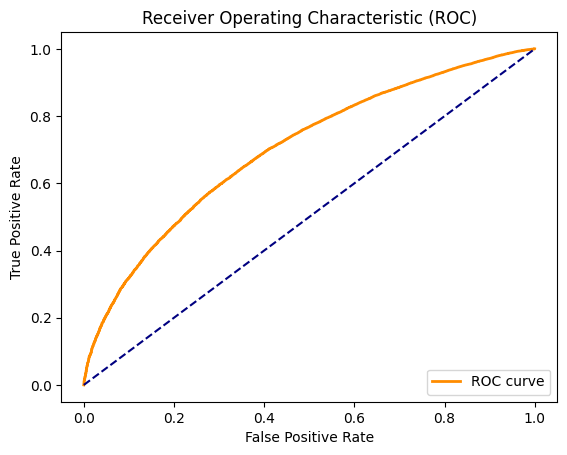

Area under ROC curve (AUROC): 0.7021735129851847


In [47]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUROC
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
print('Area under ROC curve (AUROC):', AUROC)

### Gini and Kolmogorov-Smirnov

In [48]:
def calculate_cumulative_stats(df):
    df_sorted = df.sort_values('y_hat_test_proba')
    df_sorted.reset_index(inplace=True)
    df_sorted['Cumulative N Population'] = df_sorted.index + 1
    df_sorted['Cumulative N Good'] = df_sorted['loan_data_targets_test'].cumsum()
    df_sorted['Cumulative N Bad'] = df_sorted['Cumulative N Population'] - df_sorted['loan_data_targets_test'].cumsum()
    df_sorted['Cumulative Perc Population'] = df_sorted['Cumulative N Population'] / df_sorted.shape[0]
    df_sorted['Cumulative Perc Good'] = df_sorted['Cumulative N Good'] / df_sorted['loan_data_targets_test'].sum()
    df_sorted['Cumulative Perc Bad'] = df_sorted['Cumulative N Bad'] / (df_sorted.shape[0] - df_sorted['loan_data_targets_test'].sum())
    return df_sorted

In [49]:
def plot_cumulative_statistics(df, Gini, KS):
    plt.figure(figsize=(12, 6))

    # Plot Gini
    plt.subplot(1, 2, 1)
    plt.plot(df['Cumulative Perc Population'], df['Cumulative Perc Bad'], label='Cumulative % Bad')
    plt.plot(df['Cumulative Perc Population'], df['Cumulative Perc Population'], linestyle='--', color='k')
    plt.xlabel('Cumulative % Population')
    plt.ylabel('Cumulative %')
    plt.title('Gini')
    plt.legend()
    plt.text(0.6, 0.2, f'Gini Index: {Gini:.4f}', fontsize=12, ha='center', va='center')

    # Plot Kolmogorov-Smirnov
    plt.subplot(1, 2, 2)
    plt.plot(df['y_hat_test_proba'], df['Cumulative Perc Bad'], color='r', label='Cumulative % Bad')
    plt.plot(df['y_hat_test_proba'], df['Cumulative Perc Good'], color='b', label='Cumulative % Good')
    plt.xlabel('Estimated Probability for being Good')
    plt.ylabel('Cumulative %')
    plt.title('Kolmogorov-Smirnov')
    plt.legend()
    plt.text(0.6, 0.2, f'KS Statistic: {KS:.4f}', fontsize=12, ha='center', va='center')

    plt.tight_layout()
    plt.show()

In [50]:
# Calculate cumulative statistics
df_cumulative_stats = calculate_cumulative_stats(df_actual_predicted_probs)

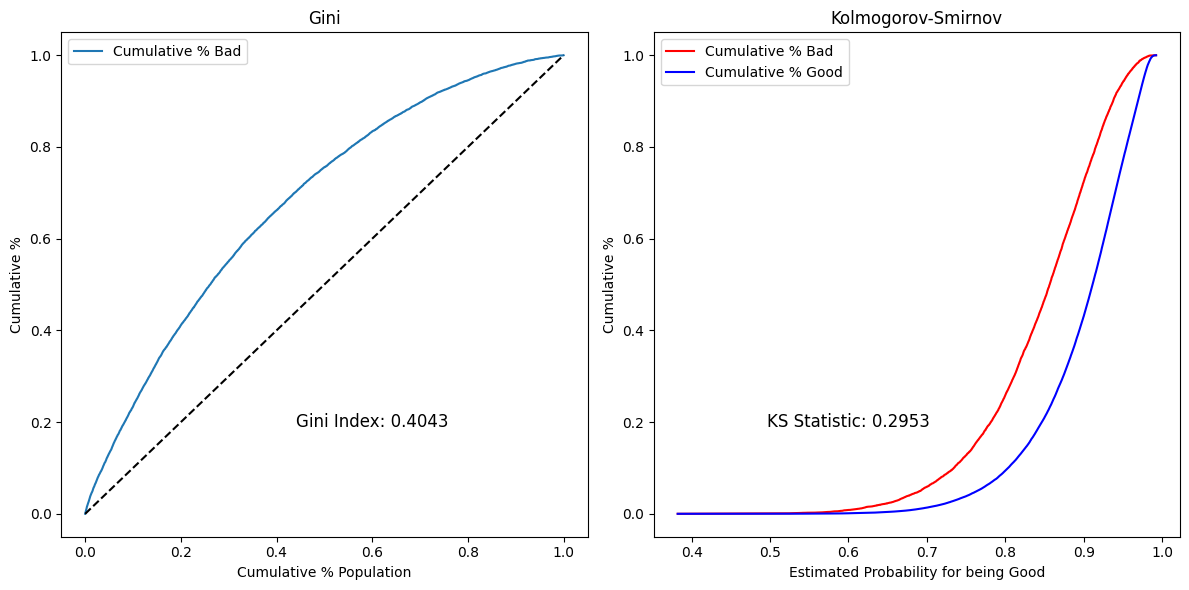

In [51]:
# Calculate Gini and KS
Gini = AUROC * 2 - 1
KS = max(df_cumulative_stats['Cumulative Perc Bad'] - df_cumulative_stats['Cumulative Perc Good'])

# Plot cumulative statistics, Gini, and KS
plot_cumulative_statistics(df_cumulative_stats, Gini, KS)

### Saving all the variables

In [56]:
# Define the folder path
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/mywork/model/"

# Pickle and save the model
print(f"Saving the model ...")
with open(os.path.join(folder, 'pd_model.sav'), 'wb') as file:
    pickle.dump(reg2, file)
print(f"Sucessfully saved the model!!!")

Saving the model ...
Sucessfully saved the model!!!


In [58]:
inputs_test_with_ref_cat.to_csv(os.path.join(folder, 'pd_inputs_test_with_ref_cat.csv'))
summary_table.to_csv(os.path.join(folder, 'pd_summary_table.csv'))

In [59]:
np.save(os.path.join(folder, 'pd_y_hat_test_proba.npy'), y_hat_test_proba)